In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data

df = pd.read_csv("../data/measurements.csv")

df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
#Clean the dataframe

df['distance'] = df['distance'].str.replace(',', '.')
df['consume'] = df['consume'].str.replace(',', '.')
df['temp_inside'] = df['temp_inside'].str.replace(',', '.')
df['refill liters'] = df['refill liters'].str.replace(',', '.')

df['distance']=df['distance'].astype(float)
df['consume']=df['consume'].astype(float)
df['temp_inside']=df['temp_inside'].astype(float)
df['refill liters']=df['refill liters'].astype(float)

df['temp_inside'] = df['temp_inside'].fillna(np.mean(df['temp_inside']))

df.head(10)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [6]:
#Some metrics

print('Max distance:', max(df['distance']))
print('Min distance:',min(df['distance']))
print('Mean distance:', df['distance'].mean())
print('Standard deviation:', df['distance'].std())
print('\n')
print('Max consume:', max(df['consume']))
print('Min consume:',min(df['consume']))
print('Mean consume:', df['consume'].mean())
print('Standard deviation:', df['consume'].std())

Max distance: 216.1
Min distance: 1.3
Mean distance: 19.65283505154639
Standard deviation: 22.6678366593528


Max consume: 12.2
Min consume: 3.3
Mean consume: 4.912371134020619
Standard deviation: 1.0331715534231696


Text(0.5, 1.0, 'gas type (used)')

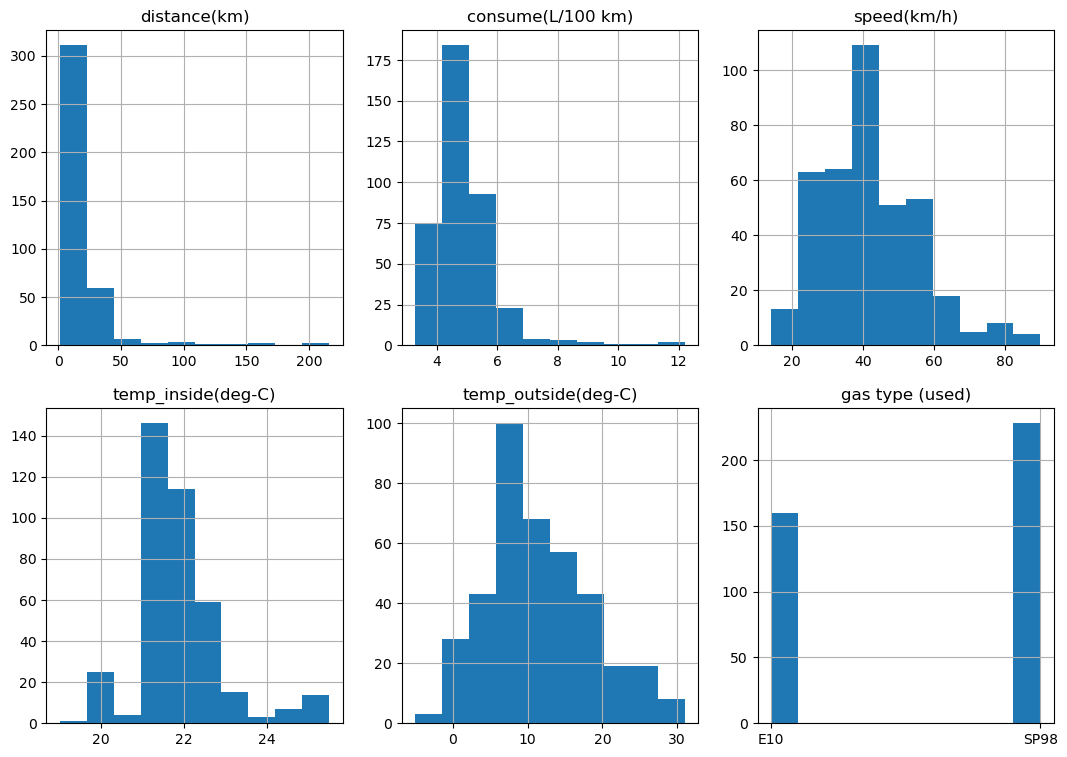

In [7]:
#Visualizations

plt.figure(figsize=(13,9))
ax1=plt.subplot(2,3,1)
df.distance.hist(bins=10,ax=ax1)
plt.title("distance(km)")

ax2=plt.subplot(2,3,2)
df.consume.hist(bins=10,ax=ax2)
plt.title("consume(L/100 km)")

ax3=plt.subplot(2,3,3)
df.speed.hist(bins=10,ax=ax3)
plt.title("speed(km/h)")

ax4=plt.subplot(2,3,4)
df.temp_inside.hist(bins=10,ax=ax4)
plt.title("temp_inside(deg-C)")

ax5=plt.subplot(2,3,5)
df.temp_outside.hist(bins=10,ax=ax5)
plt.title("temp_outside(deg-C)")

ax6= plt.subplot(2,3,6)
df.gas_type.hist(bins=10, ax=ax6)
plt.title('gas type (used)')

<Axes: >

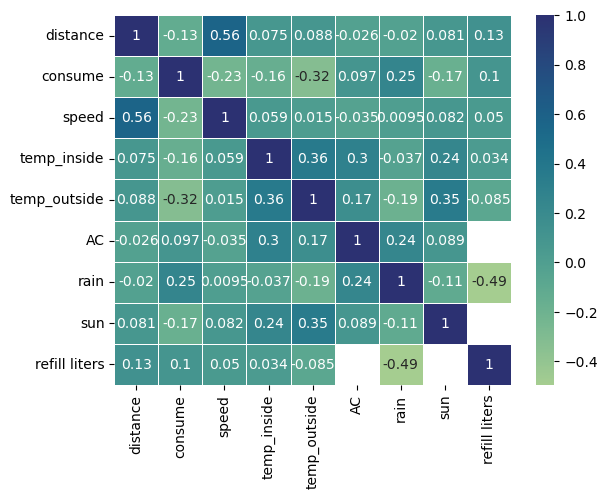

In [10]:
#Correlation matrix

df_num = df.loc[:,['distance','consume','speed','temp_inside','temp_outside','AC','rain','sun','refill liters']]

sns.heatmap(df_num.corr(), cmap='crest', annot=True, linewidth= 0.5)

gas_type       E10       SP98
mean       4.93125   4.899123
median     4.80000   4.700000
amin       3.70000   3.300000
amax      10.80000  12.200000


C:\Users\Carlos\AppData\Local\Temp\ipykernel_25044\3229377784.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consume[consume['gas_type']=="SP98"]["consume"],ax=ax4)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_25044\3229377784.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consume[co

Text(0.5, 1.0, 'gas type and consume')

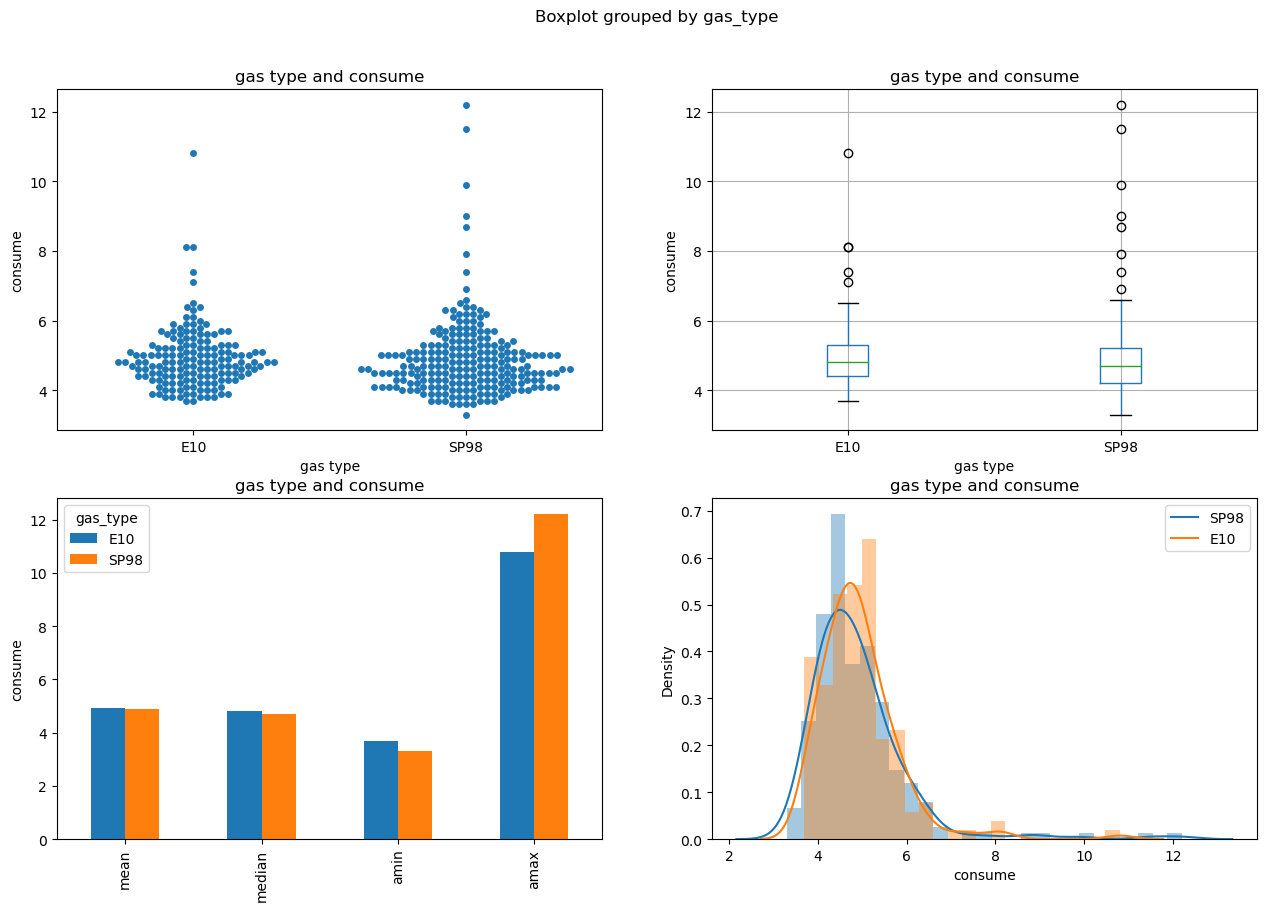

In [31]:
#Compare gas type and consume

plt.figure(figsize=(15,10))

ax1= plt.subplot(2,2,1)
sns.swarmplot(x=df['gas_type'],
              y=df['consume'],ax=ax1)
plt.xlabel('gas type')
plt.title("gas type and consume")

ax2= plt.subplot(2,2,2)
consume = df[['consume', 'gas_type']]
consume.boxplot(by='gas_type', ax=ax2)
plt.xlabel('gas type')
plt.ylabel('consume')
plt.title('gas type and consume')

ax3=plt.subplot(2,2,3)
c=df.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3)
plt.ylabel('consume')
plt.title("gas type and consume")

ax4=plt.subplot(2,2,4)
# t[t.gas_type=="SP98"].plot.kde(ax=ax4)
# t[t.gas_type=="E10"].plot.kde(ax=ax4)
sns.distplot(consume[consume['gas_type']=="SP98"]["consume"],ax=ax4)
sns.distplot(consume[consume['gas_type']=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas type and consume")

AC             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
amin     3.30000   4.000000
amax    11.50000  12.200000


C:\Users\Carlos\AppData\Local\Temp\ipykernel_25044\735042324.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['AC']==1]['consume'], ax=ax4)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_25044\735042324.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['AC']==0]['consume'], ax=a

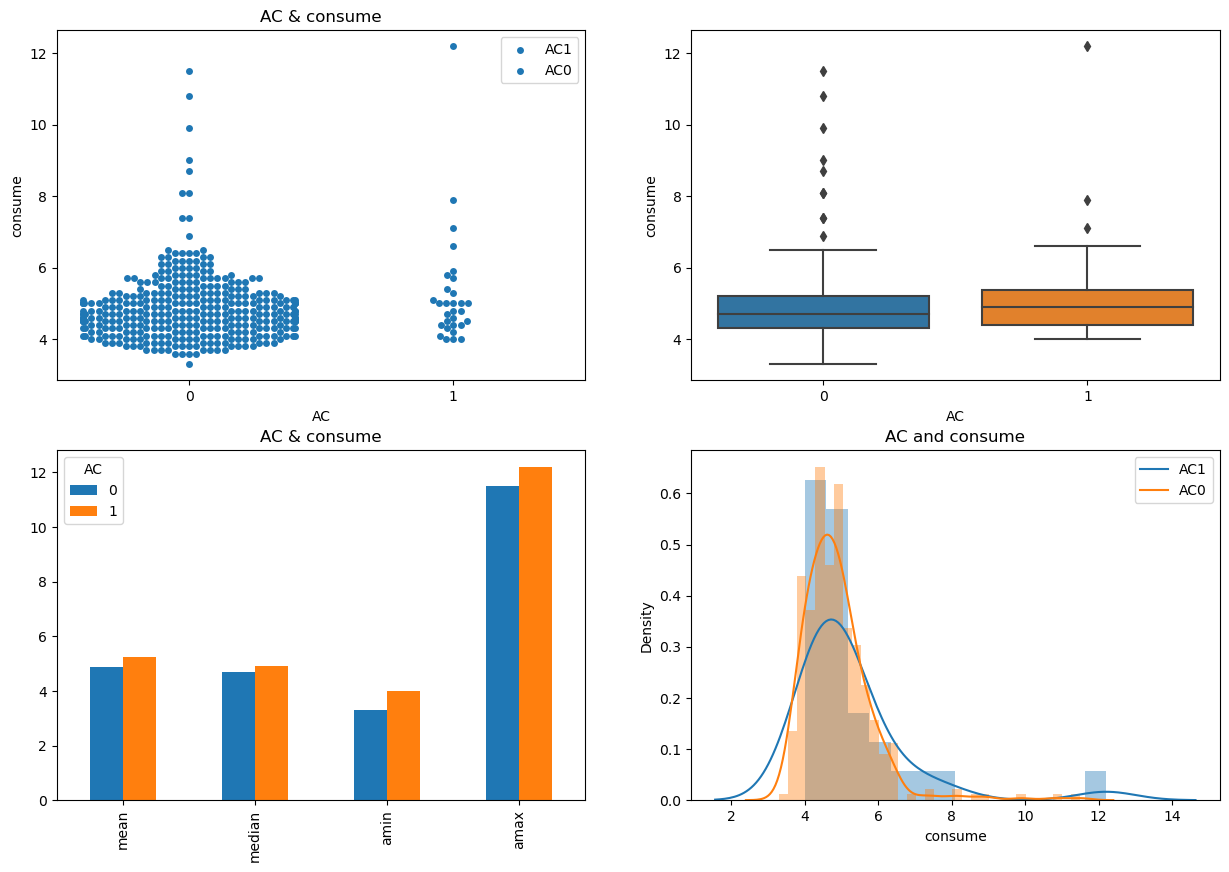

In [43]:
#Consume with AC on or off

plt.figure(figsize=(15,10))

ax1= plt.subplot(2,2,1)
sns.swarmplot(x=df['AC'],y=df['consume'],ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2= plt.subplot(2,2,2)
sns.boxplot(x=df['AC'], y=df['consume'], ax=ax2)

ax3= plt.subplot(2,2,3)
ac=df.groupby(by="AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_grouped = pd.DataFrame(ac.values.T,columns=ac.index,index=ac.columns)
print(df_grouped)
k1=df_grouped.plot(kind="bar",ax=ax3)
plt.title("AC & consume")

ax4= plt.subplot(2,2,4)
sns.distplot(df[df['AC']==1]['consume'], ax=ax4)
sns.distplot(df[df['AC']==0]['consume'], ax=ax4)
plt.legend(['AC1', 'AC0'])
plt.title('AC and consume')

ax2= plt.subplot(2,2,2)


C:\Users\Carlos\AppData\Local\Temp\ipykernel_25044\2918847353.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.AC==0)&(df.gas_type=="E10")].consume,ax=ax1)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_25044\2918847353.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.AC==1)&(d

Text(0.5, 1.0, 'SP98: AC & consume')

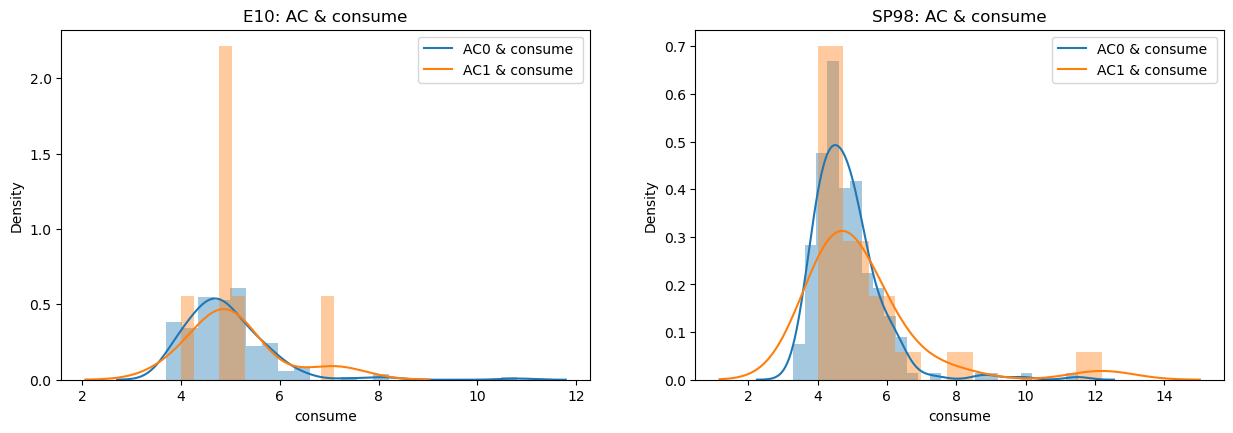

In [46]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.AC==0)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.AC==1)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["AC0 & consume ","AC1 & consume"])
plt.title("E10: AC & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.AC==0)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.AC==1)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["AC0 & consume ","AC1 & consume"])
plt.title("SP98: AC & consume")

Text(0.5, 1.0, 'E10 distance and consume')

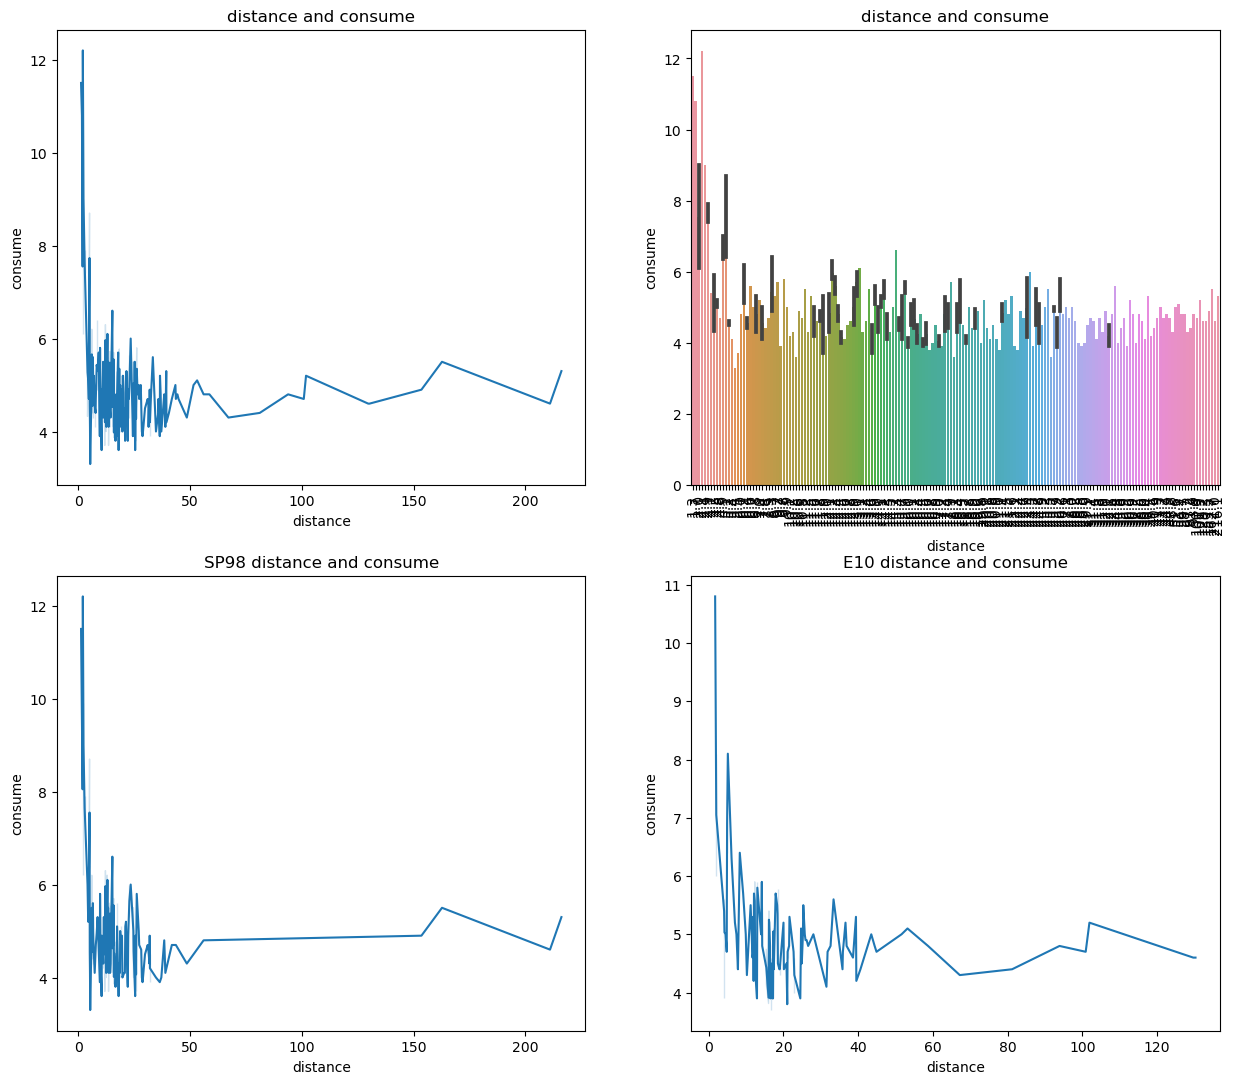

In [56]:
#compare consume and distance

plt.figure(figsize=(15,13))

ax1=plt.subplot(2,2,1)
sns.lineplot(x=df['distance'], y=df['consume'],ax=ax1)
plt.title("distance and consume")
ax2=plt.subplot(2,2,2)
sns.barplot(x=df['distance'], y=df['consume'],ax=ax2)
plt.xticks(rotation=90)
plt.title("distance and consume")


#compare with the gas type

ax3= plt.subplot(2,2,3)
sns.lineplot(x=df[df['gas_type']=='SP98']['distance'], y=df[df['gas_type']=='SP98']['consume'], ax=ax3)
plt.title('SP98 distance and consume')

ax4= plt.subplot(2,2,4)
sns.lineplot(x=df[df['gas_type']=='E10']['distance'], y=df[df['gas_type']=='E10']['consume'], ax=ax4)
plt.title('E10 distance and consume')

Text(0.5, 1.0, 'E10 speed and consume')

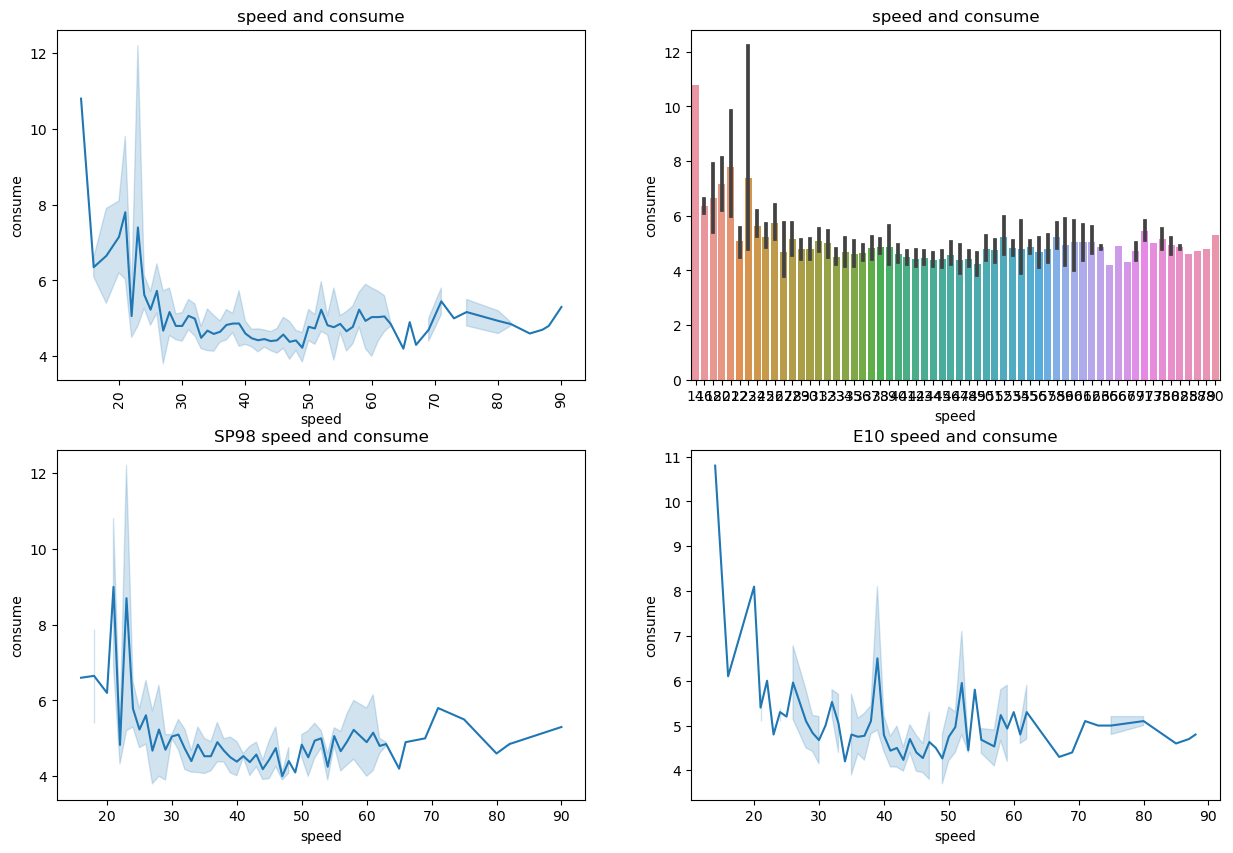

In [62]:
#Compare consume and speed

plt.figure(figsize=(15,10))

ax1=plt.subplot(2,2,1)
sns.lineplot(x=df['speed'], y=df['consume'],ax=ax1)
plt.xticks(rotation=90)
plt.title("speed and consume")

ax2=plt.subplot(2,2,2)
sns.barplot(x=df['speed'], y=df['consume'],ax=ax2)
plt.title("speed and consume")

#compare with gas type

ax3= plt.subplot(2,2,3)
sns.lineplot(x=df[df['gas_type']=='SP98']['speed'], y=df[df['gas_type']=='SP98']['consume'], ax=ax3)
plt.title('SP98 speed and consume')

ax4= plt.subplot(2,2,4)
sns.lineplot(x=df[df['gas_type']=='E10']['speed'], y=df[df['gas_type']=='E10']['consume'], ax=ax4)
plt.title('E10 speed and consume')


In [65]:
#Insights

print('''
There are more data on SP98 than on E10, but it seems that E10 consumes more.

When the AC is on, car appears to consume more.

When the AC is on or off, it seems that E10 consumes more than SP98, although it´is hard
to see the sensitiveness between both gas types.


The car consume greatly when the distance is less than about 5km, when the distance rise,
the consume become rather stable, and both gas types seems to consume roughly the same.


The car consume greatly when the speed is less than about 20km/h, when the speed rise,
the consume become rather stable, and both gas types seems to consume roughly the same.


''')


There are more data on SP98 than on E10, but it seems that E10 consumes more.

When the AC is on, car appears to consume more.

When the AC is on or off, it seems that E10 consumes more than SP98, although it´is hard
to see the sensitiveness between both gas types.


The car consume greatly when the distance is less than about 5km, when the distance rise,
the consume become rather stable, and both gas types seems to consume roughly the same.


The car consume greatly when the speed is less than about 20km/h, when the speed rise,
the consume become rather stable, and both gas types seems to consume roughly the same.



